<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/13_Feature_values_scaling_and_Feature_values_choice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 標準化

In [0]:
import numpy
import pandas

In [0]:
data={'name': ['Ryo', 'Kaori', 'Hideyuki', 'Hayato', 'Miki', 'Saeko'],  # 名前
        'gender': ['M', 'F', 'M', 'M', 'F', 'F'],  # 性別
        'height': [186, 168, 175, 210, 160, 163],  # 身長
        'weight': [72, 47, 62, 90, None, numpy.NaN],  # 体重
        'age': [30, 20, None , numpy.NaN, 23, 25],  # 年齢
        'size': ['L', 'M', 'L', 'XL', None, 'S']  # 服のサイズ
     }

In [4]:
df=pandas.DataFrame(data,columns=['name', 'gender', 'age', 'height', 'weight', 'size'])
df

,name,gender,age,height,weight,size
0,Ryo,M,30.0,186,72.0,L
1,Kaori,F,20.0,168,47.0,M
2,Hideyuki,M,NaN,175,62.0,L
3,Hayato,M,NaN,210,90.0,XL
4,Miki,F,23.0,160,NaN,None
5,Saeko,F,25.0,163,NaN,S


In [0]:
# reshape(-1, 1) は StandardScaler に入力するために、numpy.array の shape を変更しています
# astype(float) は numpy.array のデータタイプを float に変更しています
X = df['height'].values.reshape(-1, 1).astype(float)


In [0]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

print(X_std)
print()
print('average:',X_std.mean())
print('standard deviation:',X_std.std())

[[ 0.5284982 ]
 [-0.5284982 ]
 [-0.11744404]
 [ 1.93782672]
 [-0.99827437]
 [-0.82210831]]

average: 1.850371707708594e-17
standard deviation: 1.0


# 正規化

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

print(X_norm)
print()
print('Max',X_norm.max())
print('Min',X_norm.min())

[[0.52]
 [0.16]
 [0.3 ]
 [1.  ]
 [0.  ]
 [0.06]]

Max 1.0
Min 0.0


# 特徴量の選択

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:,:10]
y= breast_cancer.target
columns=['radius','texture','Circumference','area','smoothness','compactness','dent','number_of_dent','Symmetry','fractal dimension']


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(max_depth=None,n_estimators=100,random_state=42)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
from matplotlib import pyplot
#pyplot.rcParams[]

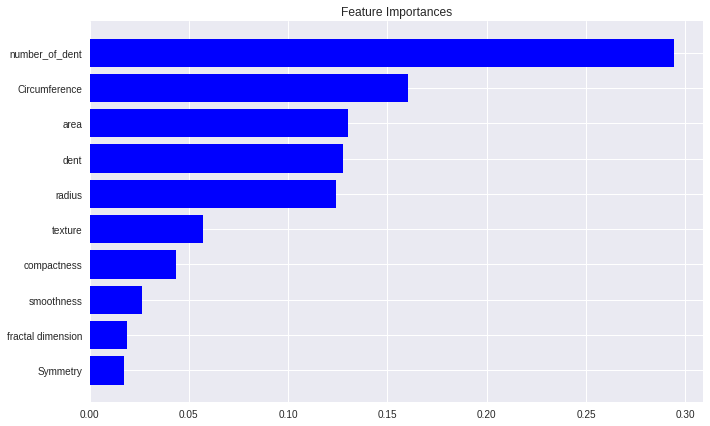

In [34]:
feature_names = numpy.array(columns)
feature_importances = rf.feature_importances_
indices = numpy.argsort(feature_importances)

pyplot.figure(figsize=(11,7))
pyplot.title('Feature Importances')
pyplot.barh(range(len(indices)),feature_importances[indices],color='b',align='center')
pyplot.yticks(range(len(indices)),feature_names[indices])
pyplot.show()

In [35]:
# 特徴量重要度の平均値
mu = feature_importances.mean()
# 平均値以上の特徴量
print(feature_names[feature_importances > mu])

['radius' 'Circumference' 'area' 'dent' 'number_of_dent']
